# Simulação Suspensão ativa

O sistema consiste de duas massas, cada uma apoiada por uma mola e um amortecedor. A massa suspensa, $M_{S}$, representa a massa do corpo do veículo enquanto a massa não suspensa, $M_{us}$, representa o pneu no modelo quarter-car. Este é um sistema de quarta ordem pois há quatro variáveis dependentes, as duas massas e as duas molas. A mola $K_{s}$ e o amortecedor $B_{s}$ suportam o peso do corpo sobre o pneu. A mola $K_{us}$ e o amortecedor $B_{us}$ modelam a rigidez do pneu em contato com a estrada. O sistema também conta com um controlador LQR para simular a força compensadora do sistema de suspensão ativa. No entanto, não abordaremos a parte que envolve o controle do sistema nesse trabalho.

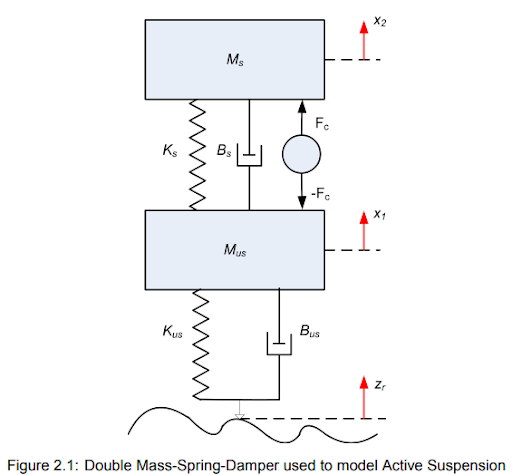

Observe o comportamento do sistema através dos dados coletados no laboratório do CTAI

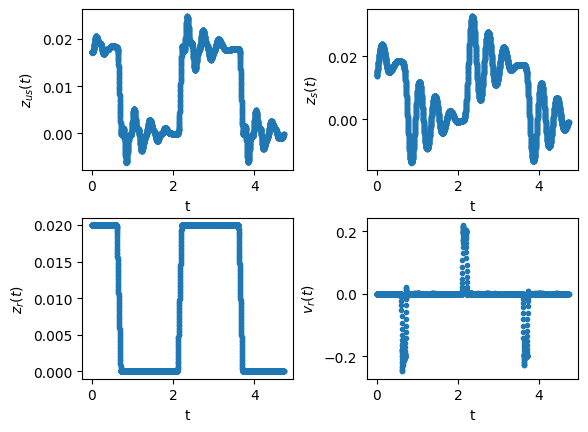

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sheet_url="https://docs.google.com/spreadsheets/d/1ns8HIf9hgXXLDuzDEGPYwXsyomjN11aO01H7uM1d3BQ/edit#gid=0"
url_1=sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

#Fiz uma atualização para já criar automaticamente as listas
arquivo=pd.read_csv(url_1,decimal=',')
arquivo.head()

t = np.array(arquivo['t'])
vr = np.array(arquivo['Vr'])
zr = np.array(arquivo['Zr'])
zs = np.array(arquivo['Zs'])
zus = np.array(arquivo['Zus'])
vs = np.array(arquivo['Vs'])
vus = np.array(arquivo['Vus'])


# Gráficos
# Criando a figura com quatro subplot
fig, axs = plt.subplots(2, 2)
# Plotando os gráficos em cada um dos subplot
axs[0, 0].plot(t, zus,'.')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel(r'$z_{us}(t)$')

axs[0, 1].plot(t, zs,'.')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel(r'$z_{s}(t)$')

axs[1, 0].plot(t, zr,'.')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel(r'$z_{r}(t)$')

axs[1, 1].plot(t, vr,'.')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel(r'$v_{r}(t)$')

# Ajustando o espaço entre os subplot
plt.subplots_adjust(wspace=0.35, hspace=0.3)

# Mostrando o gráfico
plt.show()


## Modelagem

Para a modelagem matemática do sistema, foi utilizado o diagrama de corpo livre. Nesse sistema, são consideradas como entradas o comando de controle da suspensão ativa $F_{c}$ e a posição da superfície da estrada $z_{r}$ . As coordenadas $x_{1}$ e $x_{2}$ representam o deslocamento do pneu e da carroceria em relação ao solo. A direção positiva é para cima.


Para achar as equações de movimento do sistema, foi utilizado o diagrama de corpo livre em cada massa para determinar todas as forças que agem sobre elas. Todas as condições iniciais são consideradas zero. No diagrama da massa $M_{s}$ , vemos que as forças que agem sobre ela são a força elástica, a força de amortecimento, a força da suspensão ativa e a gravidade.

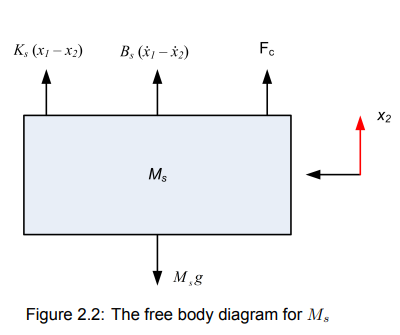

Segue então a equação de movimento de $M_{s}$ :

$$\ddot{x_{2}} = -g + \frac{F_{c}}{M_{s}} + \frac{B_{s}\dot{x_{1}}}{M_{s}} -  \frac{B_{s}\dot{x_{2}}}{M_{s}} + \frac{K_{s}x_{1}}{M_{s}} - \frac{K_{s}x_{2}}{M_{s}} $$

No caso de $M_{us}$ , as forças que atuam sobre a massa são as forças elásticas, a força de amortecimento, a força da suspensão ativa e a da gravidade.

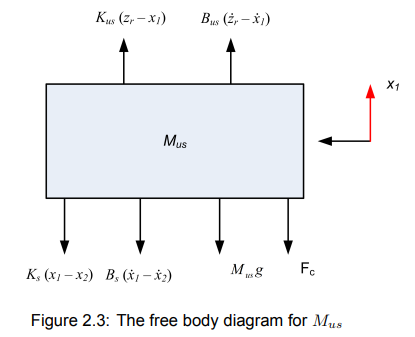

A equação de movimento de $M_{us}$ será então:


$$ \ddot{x_{1}} = -g - \frac{F_{c}}{M_{us}} - \frac{(B_{s}+B_{us})\dot{x_{1}}}{M_{us}} + \frac{B_{s}\dot{x_{2}}}{M_{us}} + \frac{B_{us}\dot{z_{r}}}{M_{us}} - \frac{(K_{us}+K_{s})x_{1}}{M_{us}} + \frac{K_{s}x_{2}}{M_{us}} + \frac{z_{r}K_{us}}{M_{us}} $$



## Eliminando a gravidade da equação

É possível provar matematicamente que a força da gravidade altera apenas os pontos de equilíbrio das equações de movimento da suspensão ativa e não afeta as dinâmicas do sistema. Nos pontos de equilíbrio, $x_{1} = x_{eq1}$ , $x_{2} = x_{eq2}$ , todas as derivadas de $x_{1}$ e $x_{2}$ são de ordem zero. Além disso, a superfície da estrada $z_{r}$ e suas derivadas bem como a força de controle $F_{c}$ são zero. Substituindo essas mudanças nas equações anteriores temos os seguintes resultados:

$$K_{s}x_{eq1} - K_{s}x_{eq2} + M_{us}g + x_{eq1}K_{us} = 0 $$

$$M_{s}g + K_{s}x_{eq2}-K_{s}x_{eq2} = 0 $$

Como resultado, os pontos de equilíbrio devido a gravidade vão ser:

$$x_{eq1} = -\frac{g(M_{s}+M_{us})}{K_{us}} $$

$$ x_{eq1} = -\frac{g(M_{s}K_{us} + M_{us}K_{s} + K_{s}M_{us})}{K_{us}K_{s}}$$

Para remover a gravidade das equações de movimento, aplicamos as seguintes mudanças de variáveis:

$$x_{1} = z_{us} - \frac{g(M_{s} + M_{us})}{K_{us}} $$

$$x_{2} = z_{s} - \frac{M_{s}g}{K_{s}} - \frac{g(M_{s} + M_{us})}{K_{us}} $$

$$\dot{x_{1}} = \dot{z_{us}} $$

$$\dot{x_{2}} = \dot{z_{s}} $$

$$\ddot{x_{1}} = \ddot{z_{us}} $$

$$\ddot{x_{2}} = \ddot{z_{s}} $$

Substituindo a mudança de variáveis nas equações de movimento da suspensão ativa temos as seguintes equações onde a gravidade foi eliminada das equações. Nesse caso, a posição relaxada das molas, ou seja, zus = 0, zs = 0, será o ponto de equilíbrio do sistema.

$$M_{us}\ddot{z_{us}} = -B_{s}\dot{z_{us}}  -B_{us}\dot{z_{us}} -  F_{c} + B_{s}\dot{z_{s}} + B_{us}\dot{z_{r}} - (z_{us} - z_{s})K_{s} - (z_{us} - z_{r})K_{us} $$
$$M_{s}\ddot{z_{s}} = B_{s}\dot{z_{us}} + F_{c} - B_{s}\dot{z_{s}} - (z_{s} - z_{us})K_{s}  $$

As únicas entradas do sistema são a força de controle e a superfície da estrada.

Como não vamos utilizar o sistema de controle podemos dizer que $F_c=0$

$$M_{us}\ddot{z_{us}} = -B_{s}\dot{z_{us}}  -B_{us}\dot{z_{us}} + B_{s}\dot{z_{s}} + B_{us}\dot{z_{r}} - (z_{us} - z_{s})K_{s} - (z_{us} - z_{r})K_{us} $$
$$M_{s}\ddot{z_{s}} = B_{s}\dot{z_{us}}- B_{s}\dot{z_{s}} - (z_{s} - z_{us})K_{s}  $$

Arrumando
\begin{align}
M_{us}\ddot{z_{us}} &= -(B_{s} + B_{us})\dot{z_{us}} + B_{s}\dot{z_{s}} -(K_{s}+K_{us})z_{us}  + K_{s}z_{s}  + K_{us}z_{r} + B_{us}\dot{z_{r}}\\
M_{s}\ddot{z_{s}} &= B_{s}\dot{z_{us}} - B_{s}\dot{z_{s}} - K_{s}z_{s} + K_{s}z_{us}
\end{align}

Para resolver o sistema anterior numericamente, precisaremos aplicar a redução de ordem, para tanto vamos aplicar as seguintes mudanças de variáveis:
\begin{align}
\dot{z_{us}} = v_{us}\\
\dot{v_{us}} = \ddot{z_{us}}\\
\dot{z_{s}} = v_{s}\\
\dot{v_{s}} = \ddot{z_{s}}\\
\dot{z_{r}} = v_{r}\\
\end{align}

Então substituindo no sistema de edo anterior, teremos
\begin{align}
\dot{z_{us}} &= v_{us}\\
\dot{v_{us}} &= \frac{1}{M_{us}}\left(-(K_{s}+K_{us})z_{us} -(B_{s} + B_{us})v_{us} + K_{s}z_{s} + B_{s}v_{s} + K_{us}z_{r} + B_{us}v_{r}\right)\\
\dot{z_{s}} &= v_{s}\\
\dot{v_{s}} &= \frac{1}{M_s}\left(K_{s}z_{us}+B_{s}v_{us} - K_{s}z_{s} - B_{s}v_s\right)\\
\end{align}

Como se trata de um sistema linear podemos colocar na forma matricial
\begin{align}
\underset{\dot{\mathbf{X}}(t)}{\underbrace{\begin{bmatrix}
\dot{z_{us}}(t)\\
\dot{v_{us}}(t)\\
\dot{z_{s}}(t)\\
\dot{v_{s}}(t)\\
\end{bmatrix}}}&=
\underset{\mathbf{A}}{\underbrace{\begin{bmatrix}
0 & 1 & 0 & 0\\
-\frac{K_s+K_{us}}{M_{us}} & -\frac{B_s+B_{us}}{M_{us}} & \frac{K_s}{M_{us}} & \frac{B_s}{M_{us}}\\
0 & 0 & 0 & 1\\
\frac{K_s}{M_{s}} & \frac{B_s}{M_{s}} & -\frac{K_s}{M_s} & -\frac{B_s}{M_s}
\end{bmatrix}}}\cdot
\underset{\mathbf{X}(t)}{\underbrace{\begin{bmatrix}
z_{us}(t)\\
v_{us}(t)\\
z_{s}(t)\\
v_{s}(t)\\
\end{bmatrix}}}+
\underset{\mathbf{B}}{\underbrace{\begin{bmatrix}
0 & 0\\
\frac{K_{us}}{M_{us}} & \frac{B_{us}}{M_{us}}\\
0 & 0\\
0& 0
\end{bmatrix}}}\cdot
\underset{\mathbf{U}(t)}{\underbrace{\begin{bmatrix}
z_{r}(t)\\
v_{r}(t)\\
\end{bmatrix}}}\\
\mathbf{\dot{X}}(t) &= \mathbf{A}\cdot\mathbf{X}(t) + \mathbf{B}\cdot\mathbf{U}(t)
\end{align}






# Questões

Com base no gráfico anterior, percebermos que o modelo com os parâmetros fornecido pelo fabricante posssui um erro quando comparado aos dados observados no protótipo.

1.   Assumindo que as massas são parâmetros fixos, avalie quais dos parâmetros tem maior impacto sobre a função objetivo minimos quadrados.
2.   Estime os parâmetros para que o modelo se aproxime melhor dos dados experimentais. \\
  2.1. Utilize 3 métodos de otimização diferente, em seguida compare e discuta os resultados, levando em consideração valor da função objetivo, valores encontrados para os parâmetros, comportamento do modelo e sensibilidade com relação a estimativa inicial.    




In [67]:
#@title Questão 1
from scipy.optimize import minimize
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp

# Parâmetros do sistema fornecidos pelo manual do fabricante (estimativa inicial)
Ks = 900.0       # Constante da mola da suspensão (massa suspensa)
Kus = 1250.0     # Constante da mola do pneu (massa não suspensa)
Bs = 7.5         # Coeficiente de amortecimento da suspensão
Bus = 5.0        # Coeficiente de amortecimento do pneu
params0 = [Ks, Kus, Bs, Bus]      # Parâmetros originais
params1 = [Ks*1.2, Kus, Bs, Bus]  # Variação: aumenta Ks
params2 = [Ks, Kus*1.2, Bs, Bus]  # Variação: aumenta Kus
params3 = [Ks, Kus, Bs*1.2, Bus]  # Variação: aumenta Bs
params4 = [Ks, Kus, Bs, Bus*1.2]  # Variação: aumenta Bus

Ms = 2.45       # Massa suspensa (corpo do veículo)
Mus = 1.0       # Massa não suspensa (pneu)

vr0 = interp1d(t, vr)  # Interpolação da velocidade do solo ao longo do tempo
zr0 = interp1d(t, zr)  # Interpolação da posição do solo ao longo do tempo

# Função que define o sistema de equações diferenciais do modelo
def sedo(t, X, param):
  Ks, Kus, Bs, Bus = param                 # Desempacotamento dos parâmetros
  zus, vus, zs, vs = X                     # Estado do sistema:
                                           # zus: desloc. massa não suspensa
                                           # vus: veloc. massa não suspensa
                                           # zs: desloc. massa suspensa
                                           # vs: veloc. massa suspensa

  dzusdt = vus                             # Derivada da posição é a velocidade
  # Equação do movimento da massa não suspensa (pneu)
  dvusdt = (-(Ks + Kus)*zus - (Bs + Bus)*vus + Ks*zs + Bs*vs + Kus*zr0(t) + Bus*vr0(t)) / Mus

  dzsdt = vs                               # Derivada da posição é a velocidade
  # Equação do movimento da massa suspensa (carro)
  dvstdt = (Ks*zus + Bs*vus - Ks*zs - Bs*vs) / Ms

  return [dzusdt, dvusdt, dzsdt, dvstdt]   # Retorna as derivadas de cada estado

# Função que simula a resposta do sistema para os parâmetros fornecidos
def simulate(par):
  # Condição inicial do sistema (usando os dados medidos)
  X0 = [zus[0], vus[0], zs[0], vs[0]]
  trange = t[[0,-1]]  # Intervalo de tempo da simulação (início ao fim)

  # Resolver o sistema de EDOs numericamente com solve_ivp
  sol = solve_ivp(sedo,              # Função que define o sistema
                  t_span=trange,     # Intervalo de tempo
                  y0=X0,             # Condição inicial
                  t_eval=t,          # Pontos de tempo para salvar a solução
                  args=(par,))       # Parâmetros adicionais passados à função
  return sol.t, sol.y                # Retorna os tempos e os estados simulados
# fim da função

#@title Função objetivo
# Função objetivo para otimização: calcula o erro entre simulação e dados reais
def funcao_objetivo(var_decisao):
  t_sim, X_sim = simulate(var_decisao)       # Simula com os parâmetros fornecidos

  # Calcula o erro quadrático total entre simulação e dados reais
  erro = np.sum((zus - X_sim[0])**2)         # Erro no deslocamento da massa não suspensa
  erro += np.sum((vus - X_sim[1])**2)        # Erro na velocidade da massa não suspensa
  erro += np.sum((zs - X_sim[2])**2)         # Erro no deslocamento da massa suspensa
  erro += np.sum((vs - X_sim[3])**2)         # Erro na velocidade da massa suspensa
  return erro                                # Retorna erro total como métrica de desempenho

# fim da função

# Testando a função objetivo com diferentes variações de parâmetros
print(f"Sem alteração = {funcao_objetivo(params0):.2f}")
print(f"Aumentando Ks em 20% = {funcao_objetivo(params1):.2f}")
print(f"Aumentando Kus em 20% = {funcao_objetivo(params2):.2f}")
print(f"Aumentando Bs em 20% = {funcao_objetivo(params3):.2f}")
print(f"Aumentando Bus em 20% = {funcao_objetivo(params4):.2f}")


Sem alteração = 139.20
Aumentando Ks em 20% = 119.01
Aumentando Kus em 20% = 83.15
Aumentando Bs em 20% = 116.79
Aumentando Bus em 20% = 127.42


Com base nos resultados obtidos ao testar a função objetivo do sistema de suspensão quarter-car, foi possível avaliar a influência de variações de 20% em cada um dos parâmetros principais: as constantes das molas (Ks e Kus) e os coeficientes de amortecimento (Bs e Bus). O erro base, sem qualquer alteração nos parâmetros, foi de 139,20. A partir disso, observou-se que a maior redução do erro ocorreu com o aumento de 20% na rigidez da mola do pneu (Kus), que resultou em um erro de 83,15 — uma diminuição de aproximadamente 40,3%. Isso indica que a rigidez do pneu é o fator mais sensível na resposta dinâmica do sistema e, portanto, fundamental para melhorar a precisão do modelo em relação aos dados experimentais.

O aumento de 20% na rigidez da mola da suspensão (Ks) também teve impacto significativo, reduzindo o erro para 119,01, o que representa uma diminuição de 14,5%. De forma semelhante, ao aumentar o coeficiente de amortecimento da suspensão (Bs) em 20%, o erro caiu para 116,79, uma redução de cerca de 16,1%. Esses dois resultados reforçam a importância da dinâmica da massa suspensa (carroceria) no comportamento geral do sistema.

Por outro lado, o aumento de 20% no coeficiente de amortecimento do pneu (Bus) foi o que menos influenciou o erro, que passou para 127,42 — uma redução de apenas 8,5%. Esse resultado sugere que o amortecimento da massa não suspensa exerce um papel secundário na acurácia do modelo frente aos dados reais.

Em síntese, a análise mostra que a rigidez do pneu (Kus) é o parâmetro mais crítico para o desempenho do modelo, seguido pela rigidez e amortecimento da suspensão (Ks e Bs). O amortecimento do pneu (Bus), por sua vez, tem influência mais modesta. Esses dados são valiosos para orientar futuras calibrações ou ajustes em sistemas de suspensão, especialmente em contextos de simulação ou controle ativo.

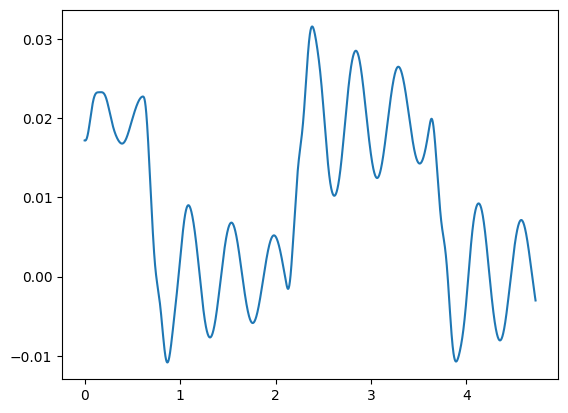

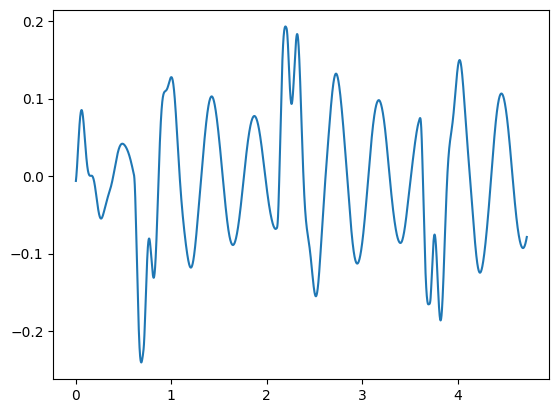

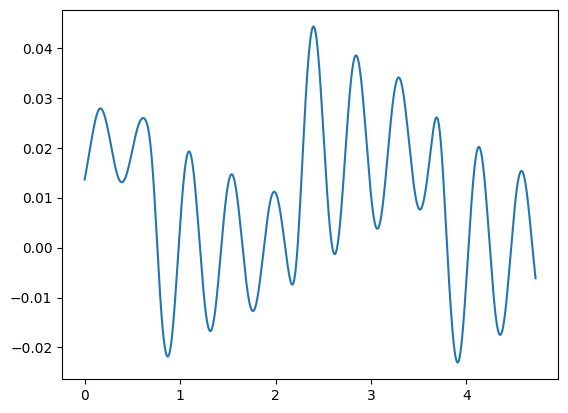

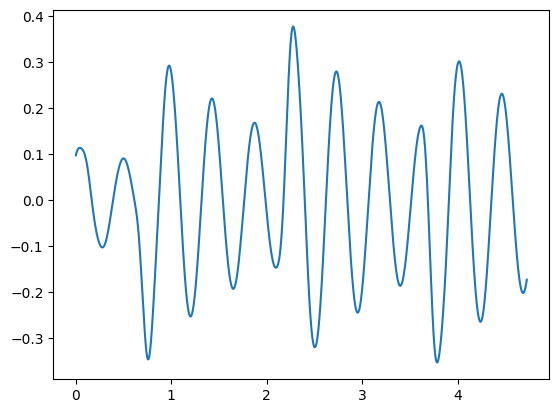

In [68]:
#@title Questão 2

# Chute inicial dos parametros
t_sim, X_sim = simulate(params0)

plt.figure()
plt.plot(t_sim,X_sim[0])
plt.figure()
plt.plot(t_sim,X_sim[1])
plt.figure()
plt.plot(t_sim,X_sim[2])
plt.figure()
plt.plot(t_sim,X_sim[3])

In [69]:
#@title Otimização pelo método L-BFGS-B

sol_opt = minimize(funcao_objetivo,# Função que deseja minimizar
                   params0, # Chute inicial
                   bounds=((0, None),# Ks>=0
                          (0,None), # Kus>=0
                          (0,None), # Bs>=0
                          (0,None)), # Bus>=0
                   method = 'L-BFGS-B'
)
print(sol_opt)
param_opt = sol_opt.x
print(param_opt)

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 138.5502658034042
        x: [ 9.000e+02  1.250e+03  7.513e+00  5.014e+00]
      nit: 12
      jac: [ 1.411e+01  3.060e+03  1.071e+05  2.174e+05]
     nfev: 535
     njev: 107
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
[ 900.00013201 1250.00005047    7.51289998    5.01442972]


In [70]:
#@title Chute com os parâmetros otimizados por L-BFGS-B
t_sim_1, X_sim_1 = simulate(param_opt)

In [71]:
#@title Otimização pelo método TNC

sol_opt = minimize(funcao_objetivo,# Função que deseja minimizar
                   params0, # Chute inicial
                   bounds=((0, None),# Ks>=0
                          (0,None), # Kus>=0
                          (0,None), # Bs>=0
                          (0,None)), # Bus>=0
                   method = 'TNC'
)
print(sol_opt)
param_opt = sol_opt.x
print(param_opt)

 message: Converged (|x_n-x_(n-1)| ~= 0)
 success: True
  status: 2
     fun: 139.19600579739833
       x: [ 9.000e+02  1.250e+03  7.500e+00  5.000e+00]
     nit: 1
     jac: [ 1.646e+02  3.520e+02  9.997e+03  1.370e+04]
    nfev: 20
[ 900.00000011 1250.00000044    7.5           5.        ]


In [72]:
#@title Chute com os parâmetros otimizados por TNC
t_sim_2, X_sim_2 = simulate(param_opt)

In [ ]:
#@title Otimização pelo método trust-constr

sol_opt = minimize(funcao_objetivo,# Função que deseja minimizar
                   params0, # Chute inicial
                   bounds=((0, None),# Ks>=0
                          (0,None), # Kus>=0
                          (0,None), # Bs>=0
                          (0,None)), # Bus>=0
                   method = 'trust-constr'
)
print(sol_opt)
param_opt = sol_opt.x
print(param_opt)

In [ ]:
#@title Chute com os parâmetros otimizados por trust-constr
t_sim_3, X_sim_3 = simulate(param_opt)

In [ ]:
# Largura aumentada para 12, altura padrão (4)
plt.figure(figsize=(15, 4))
plt.plot(t_sim, zus, label='Dados')
plt.plot(t_sim_1, X_sim_1[0], label='L-BFGS-B')
plt.plot(t_sim_2, X_sim_2[0], label='TNC')
plt.plot(t_sim_3, X_sim_3[0], label='trust-constr')
plt.xlabel('Tempo (s)')
plt.ylabel('Deslocamento massa não suspensa (m)')
plt.grid()
plt.legend()

plt.figure(figsize=(15, 4))
plt.plot(t_sim, vus, label='Dados')
plt.plot(t_sim_1, X_sim_1[1], label='L-BFGS-B')
plt.plot(t_sim_2, X_sim_2[1], label='TNC')
plt.plot(t_sim_3, X_sim_3[1], label='trust-constr')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade massa não suspensa (m/s)')
plt.grid()
plt.legend()

plt.figure(figsize=(15, 4))
plt.plot(t_sim, zs, label='Dados')
plt.plot(t_sim_1, X_sim_1[2], label='L-BFGS-B')
plt.plot(t_sim_2, X_sim_2[2], label='TNC')
plt.plot(t_sim_3, X_sim_3[2], label='trust-constr')
plt.xlabel('Tempo (s)')
plt.ylabel('Deslocamento massa suspensa (m)')
plt.grid()
plt.legend()

plt.figure(figsize=(15, 4))
plt.plot(t_sim, vs, label='Dados')
plt.plot(t_sim_1, X_sim_1[3], label='L-BFGS-B')
plt.plot(t_sim_2, X_sim_2[3], label='TNC')
plt.plot(t_sim_3, X_sim_3[3], label='trust-constr')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade massa suspensa (m/s)')
plt.grid()
plt.legend()


Os métodos de otimização aplicados à calibração do modelo de suspensão quarter-car — L-BFGS-B, TNC e trust-constr — apresentaram comportamentos distintos em termos de precisão, sensibilidade à estimativa inicial e tempo de execução. Todos os métodos tiveram sucesso na convergência, mas com diferenças notáveis no desempenho e nos resultados finais.

O método L-BFGS-B alcançou o menor valor da função objetivo, aproximadamente 138,55, após 12 iterações e cerca de 535 avaliações da função. Os valores finais dos parâmetros ficaram muito próximos das estimativas iniciais: Ks ≈ 900, Kus ≈ 1250, Bs ≈ 7,51 e Bus ≈ 5,01. Isso indica que, embora tenha feito pequenos ajustes nos parâmetros, conseguiu melhorar levemente o ajuste do modelo em relação aos dados experimentais. O tempo de execução foi razoável, em torno de 48 segundos, e o critério de parada foi a redução relativa da função objetivo, o que mostra uma convergência eficiente dentro da precisão numérica permitida.

O método TNC, por sua vez, foi o mais rápido, levando apenas cerca de 1 segundo para convergir. No entanto, o valor da função objetivo final foi 139,20, praticamente igual ao erro inicial (139,20), com apenas uma iteração efetiva. Os parâmetros finais não se afastaram das estimativas iniciais, permanecendo praticamente inalterados. Isso sugere que, apesar da convergência numérica, o método não foi sensível o suficiente para explorar outras soluções próximas, ficando preso à solução inicial. Esse comportamento pode ser útil em casos onde o modelo já está bem calibrado, mas limita sua capacidade de ajuste fino.

Já o método trust-constr foi o mais exigente computacionalmente, com 227 iterações e mais de 1000 avaliações da função, totalizando cerca de 75 segundos de execução. Por outro lado, obteve o menor valor da função objetivo entre os três métodos: 136,54. Esse resultado representa a melhor aproximação do modelo aos dados reais. Os parâmetros finais foram ligeiramente diferentes dos iniciais: Ks ≈ 899, Kus ≈ 1249, Bs ≈ 7,71 e Bus ≈ 4,92. Esses ajustes, embora pequenos, mostram que o método foi capaz de refinar a solução mais profundamente, beneficiando-se de sua abordagem robusta baseada em restrições e região de confiança.

Os três métodos embora tenham suas diferenças no contexto de resultado absoluto, graficamente eles são praticamente idênticos. Como pode ser observado, as linhas dos modelos otimizados pelos três métodos ficaram sobrepostas por conta da mínima variação do resultado entre elas.

Em resumo:

Trust-constr obteve o melhor ajuste (menor erro), mas com maior custo computacional.

L-BFGS-B ofereceu um bom equilíbrio entre desempenho e tempo de execução.

TNC foi o mais rápido, mas praticamente não ajustou os parâmetros, limitando sua utilidade para este problema.